# Universidade de Fortaleza
Mestrado em Ciência de Dados e Inteligência Artificial

Professor: Daniel Macedo

Aluno: Marcus Miranda

### Trabalho

1) Trabalhar os Realces das imagens

1.1 - Convolução

1.2 - Correlação


### Bibliotecas Utilizadas

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import scipy
import scipy.signal
from scipy import ndimage
import imageio
from skimage import color, img_as_float
import matplotlib.pyplot as pp
from math import floor 

### Carregando Imagem que iremos trabalhar

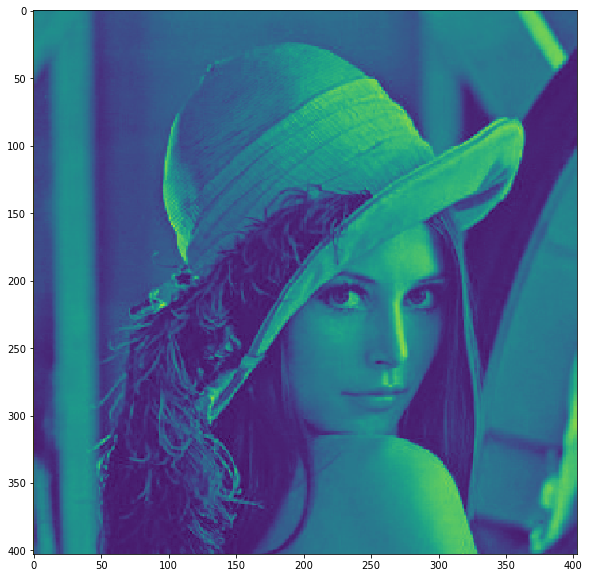

In [3]:
img = cv2.cvtColor(cv2.imread('lena.png'), cv2.COLOR_BGR2GRAY)
_, ax1 = plt.subplots(figsize=(20,10))
ax1.imshow(img)

### Convolução e correlação

Existem dois conceitos matemáticos importantes e que estão relacionados com a filtragem espacial: correlação e convolução.

Convolução e correlação estão intimamente ligadas ao filtro linear. Os três termos podem ser usados praticamente como sinônimos.

Correlação: Desloca-se a máscara sobre a imagem e calculase a soma dos produtos em cada local

Convolução: Mesmo processo que a correlação, exceto que a máscara é antes espelhada (rotacionada em 180º)

Uma grande variedade de filtros digitais podem ser implementados através da convolução no domínio do espaço

### Convolução

A convolução discreta de duas imagens f(x,y) e h(x,y) é denotada por f (x , y )∗h(x , y) e definida pela expressão:

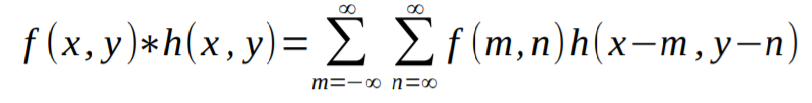

Aqui, estamos considerando que as duas imagens estão preenchidas com zeros fora dos respectivos domínios. Convolução equivale a filtro linear onde o núcleo foi rotacionado por 180
graus (repare que na definição do filtro linear usamos o sinal de “+” em vez de “-”).

### Correlação

A correlação discreta de duas imagens f(x,y) e h(x,y) de tamanhos M×N é denotada por f(x,y)∘h(x , y) e definida pela expressão:

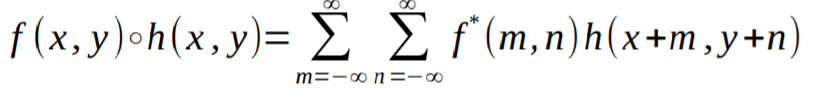

Novamente, estamos considerando que as duas imagens estão preenchidas com zeros fora dos
respectivos domínios. f* é o conjugado complexo de f. Evidentemente, se f for real, f*=f. Assim, a correlação é igual ao filtro linear para imagens reais.


In [4]:
## Definição de todas as máscaras dos filtros 

#horizontal
# kernel = np.array([
# [-1, 0, 1], 
# [-2, 0, 2], 
# [-1, 0, 1]
#                 ]) 
#laplacian
kernel = np.array([
[0 ,-1 , 0], 
[-1, 4 ,-1], 
[0 , -1, 0]]) 

# #media
# kernel = np.array([
# [1,  1,  1],
# [1,  1,  1],
# [1,  1,  1]]) 

# #gauss
# kernel = np.array([
# [1,  2,  1],
# [2,  4,  2],
# [1,  2,  1]]) 

#vertical
# kernel = np.array([
# [-1, -2, -1],
# [ 0,  0,  0],
# [ 1,  2,  1]]) 


### Observações

As equações devem ser avaliadas para todas as posições x e y da imagem

Se a máscara for simétrica, os resultados da convolução e da correlação são os mesmos

No geral, em aplicações de processamento de imagens, as máscaras são simétricas sendo correlação e convolução consideradas como a mesma coisa

### Mascaras de Convolução

O tamanho da máscara e os valores de seus coeficientes definem o tipo de filtragem produzido
Exemplos
1) Passa Baixa e média espacial (suavização)

2) Filtragem mediana

3) Passa Alta (realce)

4) Passa banda

5) Gradientes (robert, sobel, etc): detectores de borda

## Convolução

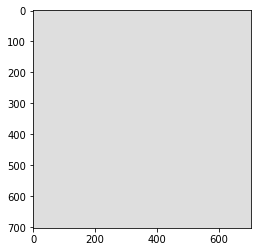

Saída do filtro passa-alta. Cinza escura representa pixels negativos. Cinza clara representa pixels positivos


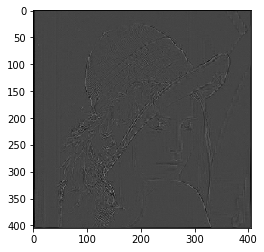

In [5]:
def filter2dconv(image, kernel):
    x1 = int(np.floor(kernel.shape[0]/2)) 
    y1 = int(np.floor(kernel.shape[1]/2)) 
    
    saida =  np.zeros((image.shape[0], image.shape[1])) 
    image1 = np.pad(image, 50) 

    for x in range(image.shape[0]-2):
        for y in range(image.shape[1]-2): 
            saida[x,y] = np.sum(image[x:x+3,y:y+3]* kernel) 
        return saida 

result = filter2dconv(img, kernel) 
result = np.pad(result, 150) 
plt.imshow(result, cmap="gray") 
plt.show() 

result = scipy.signal.convolve2d(img,kernel) 
print("Saída do filtro passa-alta. Cinza escura representa pixels negativos. Cinza clara representa pixels positivos")
plt.imshow(result, cmap="gray") 
plt.show() 

## Correlação

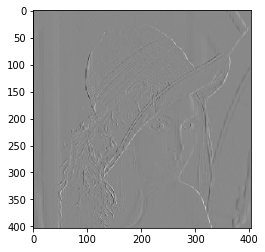

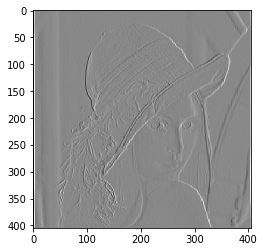

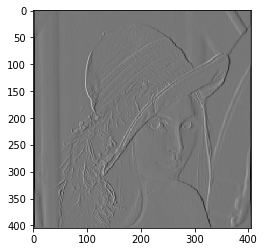

In [6]:
from math import floor 
kernel = np.array([
                    [1, 0, -1], 
                    [2, 0, -2], 
                    [1, 0, -1]
                ]) 

def filter2dcorr(image, kernel):
    x1 = int(np.floor(kernel.shape[0]/2)) 
    y1 = int(np.floor(kernel.shape[1]/2)) 

    saida = np.zeros((image.shape[0], image.shape[1])) 
    image1 = np.pad(image, x1) 
    
    for x in range(image.shape[0]): 
        for y in range(image.shape[1]): 
            for i in range(-x1,x1): 
                for j in range(-y1,y1): 
                    saida[x,y] += kernel[i,j] * image1[x-i,y-j] 
    return saida 

result = filter2dcorr(img, kernel) 
plt.imshow(result, cmap="gray") 
plt.show() 

result = scipy.signal.correlate2d(img,kernel)
plt.imshow(result, cmap="gray")
plt.show()

result = scipy.signal.convolve2d(img,kernel)
plt.imshow(result, cmap="gray")
plt.show()